In [1]:
import pandas as pd
from google.cloud import bigquery
import os

In [96]:
import numpy as np

In [72]:
import matplotlib.pyplot as plt

In [2]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = 'sturdy-gate-417001-1fe4b0dcfb9d.json'

In [26]:
# Cliente de BigQuery
client = bigquery.Client()

# Consulta SQL
query = """
SELECT * FROM `sturdy-gate-417001.data_clean.VistaModelo`
"""

# Ejecutar la consulta y cargar los datos en un DataFrame
df = client.query(query).to_dataframe()

# Mostrar las primeras filas del DataFrame
print(df.head())

   year  month  day day_of_week  hour    borough  trips
0  2023      7    7      Friday     4     Queens    951
1  2023      7    7      Friday     7     Queens   2398
2  2023      7    7      Friday    13      Bronx   1533
3  2023      7    7      Friday    15  Manhattan   5418
4  2023      7    7      Friday    16      Bronx   1569


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88455 entries, 0 to 88454
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         88455 non-null  Int64 
 1   month        88455 non-null  Int64 
 2   day          88455 non-null  Int64 
 3   day_of_week  88455 non-null  object
 4   hour         88455 non-null  Int64 
 5   borough      88455 non-null  object
 6   trips        88455 non-null  Int64 
dtypes: Int64(5), object(2)
memory usage: 5.1+ MB


In [7]:
df['year'].unique()

<IntegerArray>
[2023, 2022]
Length: 2, dtype: Int64

In [8]:
df['month'].unique()

<IntegerArray>
[7, 8, 4, 11, 1, 10, 9, 3, 5, 12, 6, 2]
Length: 12, dtype: Int64

In [9]:
sorted(df['day'].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

In [28]:
df['datetime'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str) + ' ' + df['hour'].astype(int).astype(str) + ':00:00',
                                errors='coerce')
df.head()

,year,month,day,day_of_week,hour,borough,trips,datetime
0,2023,7,7,Friday,4,Queens,951,2023-07-07 04:00:00
1,2023,7,7,Friday,7,Queens,2398,2023-07-07 07:00:00
2,2023,7,7,Friday,13,Bronx,1533,2023-07-07 13:00:00
3,2023,7,7,Friday,15,Manhattan,5418,2023-07-07 15:00:00
4,2023,7,7,Friday,16,Bronx,1569,2023-07-07 16:00:00


In [11]:
df[df['datetime'].isnull()]

,year,month,day,day_of_week,hour,borough,trips,datetime
608,2023,4,31,Friday,23,Brooklyn,1,NaT
977,2023,11,31,Tuesday,23,Manhattan,15,NaT
4409,2022,2,31,Monday,12,Queens,1,NaT
4528,2022,2,29,Saturday,14,Queens,1,NaT
5621,2022,2,31,Monday,23,Queens,3,NaT
5682,2023,6,31,Wednesday,20,Manhattan,1,NaT
6037,2023,11,31,Tuesday,22,Manhattan,2,NaT
6038,2023,11,31,Tuesday,20,Manhattan,1,NaT
7155,2022,9,31,Wednesday,23,Brooklyn,1,NaT
10795,2023,11,31,Tuesday,21,Queens,2,NaT


In [29]:
df.loc[df['datetime'].isnull(), 'day'] -=1

In [30]:
df['datetime'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str) + ' ' + df['hour'].astype(int).astype(str) + ':00:00',
                                errors='coerce')
df.head()

,year,month,day,day_of_week,hour,borough,trips,datetime
0,2023,7,7,Friday,4,Queens,951,2023-07-07 04:00:00
1,2023,7,7,Friday,7,Queens,2398,2023-07-07 07:00:00
2,2023,7,7,Friday,13,Bronx,1533,2023-07-07 13:00:00
3,2023,7,7,Friday,15,Manhattan,5418,2023-07-07 15:00:00
4,2023,7,7,Friday,16,Bronx,1569,2023-07-07 16:00:00


In [31]:
condicion = (df['datetime'].isnull()) & (df['year'] == 2022)
df.loc[condicion, 'day'] -=1

In [32]:
df['datetime'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str) + ' ' + df['hour'].astype(int).astype(str) + ':00:00',
                                errors='coerce')
df.head()

,year,month,day,day_of_week,hour,borough,trips,datetime
0,2023,7,7,Friday,4,Queens,951,2023-07-07 04:00:00
1,2023,7,7,Friday,7,Queens,2398,2023-07-07 07:00:00
2,2023,7,7,Friday,13,Bronx,1533,2023-07-07 13:00:00
3,2023,7,7,Friday,15,Manhattan,5418,2023-07-07 15:00:00
4,2023,7,7,Friday,16,Bronx,1569,2023-07-07 16:00:00


In [33]:
df[df['datetime'].isnull()]

,year,month,day,day_of_week,hour,borough,trips,datetime
4409,2022,2,29,Monday,12,Queens,1,NaT
5621,2022,2,29,Monday,23,Queens,3,NaT
25869,2023,2,30,Wednesday,23,Queens,1,NaT
35361,2022,2,29,Monday,23,Manhattan,16,NaT
53785,2022,2,29,Monday,14,Manhattan,1,NaT
55318,2023,2,30,Wednesday,23,Manhattan,1,NaT
83136,2022,2,29,Monday,15,Manhattan,1,NaT
84726,2023,2,30,Tuesday,23,Manhattan,6,NaT
84754,2023,2,30,Tuesday,23,Queens,1,NaT


In [34]:
df.loc[condicion, 'day'] -=1
df['datetime'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str) + ' ' + df['hour'].astype(int).astype(str) + ':00:00',
                                errors='coerce')
df[df['datetime'].isnull()]

,year,month,day,day_of_week,hour,borough,trips,datetime
25869,2023,2,30,Wednesday,23,Queens,1,NaT
55318,2023,2,30,Wednesday,23,Manhattan,1,NaT
84726,2023,2,30,Tuesday,23,Manhattan,6,NaT
84754,2023,2,30,Tuesday,23,Queens,1,NaT


In [35]:
condicion = (df['datetime'].isnull()) & (df['day_of_week'] == 'Tuesday')
df.loc[condicion, 'day'] -=2

In [36]:
condicion = (df['datetime'].isnull()) & (df['day_of_week'] == 'Wednesday')
df.loc[condicion, 'day'] = 1 
df.loc[condicion, 'month'] = 3

In [37]:
df['datetime'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str) + ' ' + df['hour'].astype(int).astype(str) + ':00:00',
                                errors='coerce')
df[df['datetime'].isnull()]

,year,month,day,day_of_week,hour,borough,trips,datetime


In [38]:
df = df[['datetime', 'hour', 'borough', 'trips']].groupby(['datetime', 'hour', 'borough']).agg({'trips': 'sum'}).reset_index()

df.head()

,datetime,hour,borough,trips
0,2022-01-01,0,Bronx,1648
1,2022-01-01,0,Brooklyn,3059
2,2022-01-01,0,Manhattan,6292
3,2022-01-01,0,Queens,2419
4,2022-01-01,0,Staten Island,187


In [42]:
df.head()

,datetime,hour,borough,trips
0,2022-01-01,0,Bronx,1648
1,2022-01-01,0,Brooklyn,3059
2,2022-01-01,0,Manhattan,6292
3,2022-01-01,0,Queens,2419
4,2022-01-01,0,Staten Island,187


In [52]:
df['datetime'] = df['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [55]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [56]:
df.head()

,datetime,hour,borough,trips
0,2022-01-01,0,Bronx,1648
1,2022-01-01,0,Brooklyn,3059
2,2022-01-01,0,Manhattan,6292
3,2022-01-01,0,Queens,2419
4,2022-01-01,0,Staten Island,187


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87896 entries, 0 to 87895
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  87896 non-null  datetime64[ns]
 1   hour      87896 non-null  Int64         
 2   borough   87896 non-null  object        
 3   trips     87896 non-null  Int64         
dtypes: Int64(2), datetime64[ns](1), object(1)
memory usage: 2.9+ MB


In [61]:
pivot_df = df.pivot_table(index='datetime', columns='borough', values='trips', aggfunc='sum').drop(columns='EWR')
pivot_df.head()

borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
datetime,,,,,
2022-01-01 00:00:00,1648,3059,6292,2419,187
2022-01-01 01:00:00,1758,3124,6222,2519,193
2022-01-01 02:00:00,1685,3125,5969,2316,231
2022-01-01 03:00:00,1510,2872,5553,2111,209
2022-01-01 04:00:00,1266,2345,4141,1792,144


In [65]:
pivot_df.columns.name = None

In [66]:
pivot_df.head()

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
datetime,,,,,
2022-01-01 00:00:00,1648,3059,6292,2419,187
2022-01-01 01:00:00,1758,3124,6222,2519,193
2022-01-01 02:00:00,1685,3125,5969,2316,231
2022-01-01 03:00:00,1510,2872,5553,2111,209
2022-01-01 04:00:00,1266,2345,4141,1792,144


In [68]:
pivot_df.duplicated().sum()

0

In [69]:
pivot_df.isnull().sum()

Bronx            0
Brooklyn         0
Manhattan        0
Queens           0
Staten Island    1
dtype: int64

In [70]:
pivot_df.fillna(0, inplace=True)

In [71]:
pivot_df.isnull().sum()

Bronx            0
Brooklyn         0
Manhattan        0
Queens           0
Staten Island    0
dtype: int64

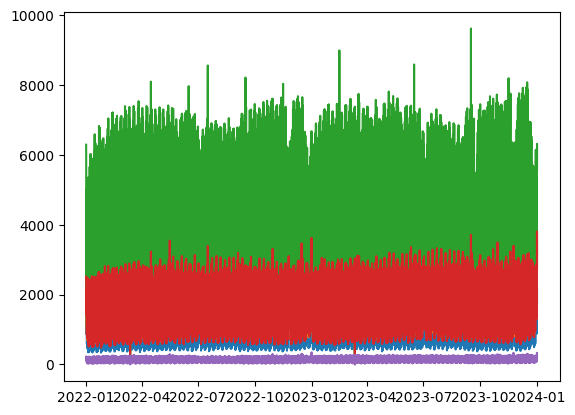

In [73]:
plt.plot(pivot_df)

In [76]:
pivot_df['Manhattan'].max()

9619

In [77]:
pivot_df['Manhattan'].min()

40

In [78]:
pivot_df.to_parquet('demanda.parquet')

In [86]:
pivot_df = pd.read_parquet('demanda.parquet')

In [87]:
pivot_df = pivot_df.reset_index()

In [90]:
pivot_df['año'] = pivot_df['datetime'].dt.year
pivot_df['mes'] = pivot_df['datetime'].dt.month
pivot_df['dia'] = pivot_df['datetime'].dt.day
pivot_df['hora'] = pivot_df['datetime'].dt.hour
pivot_df['dia_semana'] = pivot_df['datetime'].dt.weekday + 1

In [92]:
import holidays

In [101]:
pivot_df['fecha'] = pivot_df['datetime'].dt.date
years = list(pivot_df['año'].unique())
us_holidays = holidays.US(years=years)
pivot_df['holiday'] = np.where(pivot_df['fecha'].isin(us_holidays), 1, 0)
pivot_df.drop(columns='fecha', inplace=True)

In [102]:
pivot_df.head()

,datetime,Bronx,Brooklyn,Manhattan,Queens,Staten Island,año,mes,dia,hora,dia_semana,holiday
0,2022-01-01 00:00:00,1648,3059,6292,2419,187,2022,1,1,0,6,1
1,2022-01-01 01:00:00,1758,3124,6222,2519,193,2022,1,1,1,6,1
2,2022-01-01 02:00:00,1685,3125,5969,2316,231,2022,1,1,2,6,1
3,2022-01-01 03:00:00,1510,2872,5553,2111,209,2022,1,1,3,6,1
4,2022-01-01 04:00:00,1266,2345,4141,1792,144,2022,1,1,4,6,1


In [103]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 40.71,
	"longitude": -74,
	"start_date": "2021-12-31",
	"end_date": "2024-01-01",
	"hourly": ["temperature_2m", "relative_humidity_2m", "rain", "snowfall"],
	"timezone": "America/New_York"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_rain = hourly.Variables(2).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(3).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["rain"] = hourly_rain
hourly_data["snowfall"] = hourly_snowfall

df_climate = pd.DataFrame(data = hourly_data)
df_climate.head()

,date,temperature_2m,relative_humidity_2m,rain,snowfall
0,2021-12-31 04:00:00+00:00,7.7585,98.646126,0.7,0.0
1,2021-12-31 05:00:00+00:00,7.7585,98.646126,0.0,0.0
2,2021-12-31 06:00:00+00:00,7.7085,98.982658,0.3,0.0
3,2021-12-31 07:00:00+00:00,7.7585,98.983063,0.2,0.0
4,2021-12-31 08:00:00+00:00,7.5585,99.319954,0.0,0.0


In [106]:
df_climate['date'] = df_climate['date'].dt.tz_localize(None)
df_climate.rename(columns={'date': 'datetime'}, inplace=True)

In [107]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17568 entries, 0 to 17567
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              17568 non-null  datetime64[ns]
 1   temperature_2m        17568 non-null  float32       
 2   relative_humidity_2m  17568 non-null  float32       
 3   rain                  17568 non-null  float32       
 4   snowfall              17568 non-null  float32       
dtypes: datetime64[ns](1), float32(4)
memory usage: 411.9 KB


In [108]:
df_climate.head()

,datetime,temperature_2m,relative_humidity_2m,rain,snowfall
0,2021-12-31 04:00:00,7.7585,98.646126,0.7,0.0
1,2021-12-31 05:00:00,7.7585,98.646126,0.0,0.0
2,2021-12-31 06:00:00,7.7085,98.982658,0.3,0.0
3,2021-12-31 07:00:00,7.7585,98.983063,0.2,0.0
4,2021-12-31 08:00:00,7.5585,99.319954,0.0,0.0


In [111]:
columnas_X = ['año', 'mes', 'dia', 'hora', 'dia_semana', 'holiday', 'temperature_2m', 'rain', 'relative_humidity_2m', 'snowfall']
columnas_Y = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [112]:
df_entrenamiento = pivot_df.merge(df_climate, on=['datetime'], how='left').set_index('datetime')
df_entrenamiento.head()

,Bronx,Brooklyn,Manhattan,Queens,Staten Island,año,mes,dia,hora,dia_semana,holiday,temperature_2m,relative_humidity_2m,rain,snowfall
datetime,,,,,,,,,,,,,,,
2022-01-01 00:00:00,1648,3059,6292,2419,187,2022,1,1,0,6,1,8.508500,97.987221,0.0,0.0
2022-01-01 01:00:00,1758,3124,6222,2519,193,2022,1,1,1,6,1,9.308500,95.387932,0.0,0.0
2022-01-01 02:00:00,1685,3125,5969,2316,231,2022,1,1,2,6,1,8.158501,97.981651,0.0,0.0
2022-01-01 03:00:00,1510,2872,5553,2111,209,2022,1,1,3,6,1,8.208500,99.323456,0.0,0.0
2022-01-01 04:00:00,1266,2345,4141,1792,144,2022,1,1,4,6,1,7.808500,100.000000,0.0,0.0


In [114]:
df_entrenamiento = df_entrenamiento[columnas_X + columnas_Y]

In [115]:
df_entrenamiento.to_parquet('training_data.parquet')

In [116]:
df_entrenamiento.isna().sum()

año                     0
mes                     0
dia                     0
hora                    0
dia_semana              0
holiday                 0
temperature_2m          0
rain                    0
relative_humidity_2m    0
snowfall                0
Bronx                   0
Brooklyn                0
Manhattan               0
Queens                  0
Staten Island           0
dtype: int64